<h1><u>This is project on predicting survival of a person in titanic</u></h1> 



<h3> We are using <i>sklearn</i> and also <i>keras</i> to make models</h3> 

*dataset is available in kaggle website

<h3>First importing libraries</h3>

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

<h3>importing data</h3>

In [37]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [38]:
print('first 5 training rows ')
train.head()


first 5 training rows 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
print('first 5 testing rows')
test.head()

first 5 testing rows


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h4>Checking for NaN values </h4>

In [40]:
print(pd.isnull(train).sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [41]:
print(pd.isnull(test).sum()) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<h5>now we have have to remove or fill these NaN values <br> we can remove cabin and name as there are not necessary fpr survival </h5>

In [42]:
print(train.keys())
print(test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [43]:
train.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
test.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

also Name does not play any role in survival so we should drop this

In [44]:
train.drop(labels = ["Name"], axis = 1, inplace = True)
test.drop(labels = ["Name"], axis = 1, inplace = True)

In [45]:
print(pd.isnull(train).sum())
print(pd.isnull(test).sum()) 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


now we can't remove age as it plays a vital role in survival.survival of chances of a young man is more than a child or old

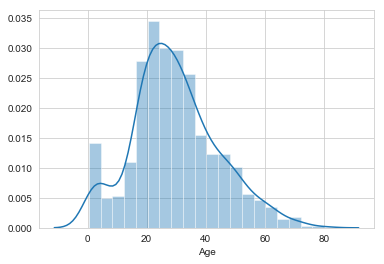

In [46]:
sample=train.copy()
sample.dropna(inplace=True)    #dropping NaN values insample
sns.distplot(sample['Age'])

We can see that young people have more chance of survival so we should fill this by median and mean make data biased 

In [47]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [48]:
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [49]:
print(pd.isnull(test).sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [51]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


All NaN values have been removed and Nan values  filled with median<br>
now checking how sex factor affects the survival


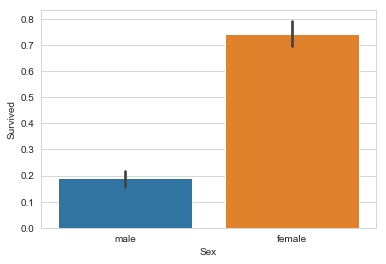

In [52]:
sns.barplot(x="Sex",y="Survived",data=train)

here we can see that females are having more chances of survival

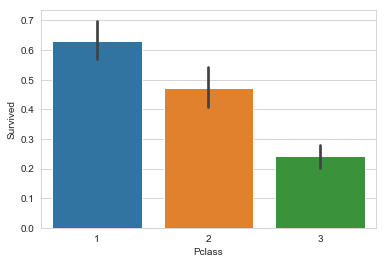

In [53]:
sns.barplot(x='Pclass',y='Survived',data=train)

survival based on class

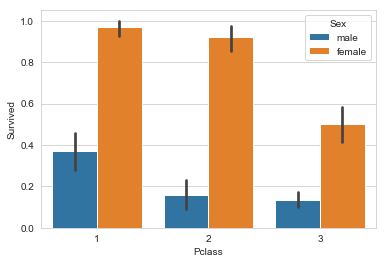

In [54]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train)

survived males and females based on classes

In [55]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
333,334,0,3,male,16.0,2,0,18.0000,S
60,61,0,3,male,22.0,0,0,7.2292,C
814,815,0,3,male,30.5,0,0,8.0500,S
103,104,0,3,male,33.0,0,0,8.6542,S
810,811,0,3,male,26.0,0,0,7.8875,S


In [56]:
test.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
382,1274,3,female,27.0,0,0,14.5000,S
267,1159,3,male,27.0,0,0,7.5500,S
294,1186,3,male,36.0,0,0,9.5000,S
390,1282,1,male,23.0,0,0,93.5000,S
177,1069,1,male,54.0,1,0,55.4417,C


now we have to change sex and embarked to numerical valeus  

In [57]:
train.replace(('male', 'female'), (1, 0), inplace=True)
#this will replace all male and female of all column we can use another method for selected column

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2



test.loc[test["Sex"] == "male", "Sex"] = 1
test.loc[test["Sex"] == "female", "Sex"] = 0

In [58]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


now data is ready to train 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score 

In [64]:
x_train=train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [65]:
y_train=train[['Survived']]

In [66]:
x_test=test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [67]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0


now we have to split our data into training and validation set 


In [69]:
from sklearn.model_selection import train_test_split


X_trainit, X_valid, y_trainit, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
#X_valid and y_valid are the validation sets

we have splitted our data into 80%-20% training and validation sets


In [71]:
rf = RandomForestClassifier()
rf.fit(X_trainit, y_trainit)
pred = rf.predict(X_valid)
acc = accuracy_score(y_valid, pred)

print(acc)

0.8268156424581006


c:\users\ashish kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


thus we have succesfully trained our model with 82% accuracy with Random Forest classifier

<h4>Now it is time to run on our test data</h4>

In [72]:
test_predict=rf.predict(x_test)

In [73]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [75]:
test_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<h2>so these are the predicted values of test dataset hence we have completed with sklearn<br> now it is time to make model on keras</h2>

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


Importing required items

In [94]:
model=Sequential()

In [95]:
model.add(Dense(32,activation='relu',input_dim=7))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [96]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [97]:
model.fit(X_trainit,y_trainit,epochs=50,batch_size=30)

Epoch 1/50
712/712 [==============================] - 0s 556us/step - loss: 1.3340 - acc: 0.6334
Epoch 2/50
712/712 [==============================] - 0s 59us/step - loss: 0.7679 - acc: 0.6699
Epoch 3/50
712/712 [==============================] - 0s 59us/step - loss: 0.6416 - acc: 0.6826
Epoch 4/50
712/712 [==============================] - 0s 58us/step - loss: 0.6173 - acc: 0.6882
Epoch 5/50
712/712 [==============================] - 0s 58us/step - loss: 0.6037 - acc: 0.7051
Epoch 6/50
712/712 [==============================] - 0s 56us/step - loss: 0.5767 - acc: 0.7121
Epoch 7/50
712/712 [==============================] - 0s 63us/step - loss: 0.5865 - acc: 0.6910
Epoch 8/50
712/712 [==============================] - 0s 58us/step - loss: 0.5736 - acc: 0.7135
Epoch 9/50
712/712 [==============================] - 0s 58us/step - loss: 0.5701 - acc: 0.7247
Epoch 10/50
712/712 [==============================] - 0s 53us/step - loss: 0.5548 - acc: 0.7177
Epoch 11/50
712/712 [=================

In [98]:
result=model.evaluate(X_valid,y_valid)

179/179 [==============================] - 0s 565us/step


In [99]:
result

[0.4079481399925061, 0.8044692720780825]

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


Thus we have achieved accuracy of 80% with just 529 parameters we can add more lyears to enhance performance

In [101]:
model.save_weights('titanic.h5')

to save model weights